<a href="https://colab.research.google.com/github/duc19102022/pytorch_tutorial/blob/main/simple_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # hidden layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [19]:
torch.manual_seed(41)

model = Model()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [33]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [35]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-35-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [40]:
X = my_df.drop('species', axis=1)
y = my_df['species']

In [41]:
X = X.values
y = y.values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [44]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [45]:
# set criterion of model
criterion = nn.CrossEntropyLoss()
# choose Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [47]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [49]:
# train model
# Epochs?
epochs = 100
losses = []
for i in range(epochs):
  # go forward and predict
  y_pred = model.forward(X_train)

  # measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # keep track of out losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i %10 == 0 :
    print(f'Epoch: {i} and loss: {loss}')

  # do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

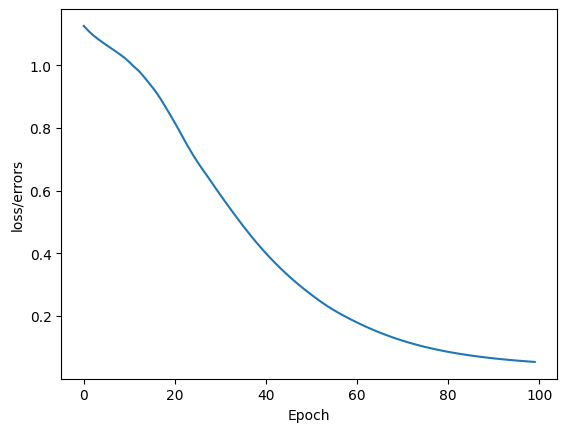

In [50]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/errors")
plt.xlabel("Epoch")

In [51]:
# evaluate model on test data
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [52]:
loss

tensor(0.1315)

In [54]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]}')

1.)  tensor([-5.8760,  4.4628,  6.5124]) 	 2
2.)  tensor([-7.5436,  4.1670,  9.7255]) 	 2
3.)  tensor([-8.4504,  5.1271, 10.1987]) 	 2
4.)  tensor([-4.3398,  5.6267,  2.5608]) 	 1
5.)  tensor([-7.1825,  4.8754,  8.2992]) 	 2
6.)  tensor([-3.3974,  5.3463,  1.2803]) 	 1
7.)  tensor([-5.9231,  4.9822,  5.9997]) 	 2
8.)  tensor([-4.2881,  5.7003,  2.3889]) 	 1
9.)  tensor([-6.5356,  4.9257,  7.1260]) 	 2
10.)  tensor([-8.0509,  4.4129, 10.3286]) 	 2
11.)  tensor([-5.6762,  4.9500,  5.6215]) 	 2
12.)  tensor([ 4.5662, -2.2476, -2.8911]) 	 0
13.)  tensor([ 4.2571, -1.9967, -2.7330]) 	 0
14.)  tensor([-2.1108,  4.0515,  0.5799]) 	 1
15.)  tensor([ 3.4575, -1.2098, -2.3514]) 	 0
16.)  tensor([-5.4724,  5.1165,  5.0934]) 	 2
17.)  tensor([ 4.0557, -1.7949, -2.6492]) 	 0
18.)  tensor([-5.8075,  4.6053,  6.2458]) 	 1
19.)  tensor([ 4.4343, -2.1392, -2.8242]) 	 0
20.)  tensor([ 3.4528, -1.2514, -2.3660]) 	 0
21.)  tensor([-2.6189,  4.5619,  0.8574]) 	 1
22.)  tensor([-7.7412,  4.7377,  9.4199]) 	

In [55]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [57]:
with torch.no_grad():
  y_rs = model(new_iris)
  print(y_rs)
  print(y_rs.argmax().item())

tensor([ 4.5365, -2.2383, -2.8684])
0


In [59]:
# save NN model
torch.save(model.state_dict(),'iris_model.pt')

In [60]:
# load model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [61]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [62]:
new_iris = torch.tensor([1.7,0.2,3.3,4.2])
with torch.no_grad():
  y_rs = new_model(new_iris)
  print(y_rs)
  print(y_rs.argmax().item())

tensor([-7.6891,  3.1488, 11.1691])
2
